In [119]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
df=pd.read_csv('C:/data_science/gridcomputing/Modified_dataset_20001.csv')

In [121]:
df.head(10)
EPSILON = 1e-10

In [122]:
df.shape

(20001, 18)

In [123]:
df.describe()

,JobID,SubmitTime,WaitTime,RunTime,NProcs,AverageCPUTimeUsed,Used Memory,ReqNProcs,ReqTime,ReqMemory,Status,UserID,GroupID,ExecutableID,QueueID,PartitionID,OrigSiteID,LastRunSiteID
count,20001.000000,2.000100e+04,2.000100e+04,20001.000000,20001.000000,20001.000000,2.000100e+04,20001.0,20001.000000,2.000100e+04,20001.000000,20001.000000,20001.000000,20001.000000,20001.000000,20001.0,20001.000000,20001.000000
mean,10001.000000,1.138189e+09,7.818666e+03,17439.609270,0.921404,15642.967252,1.905256e+05,1.0,188636.738563,6.448759e+04,1.393680,14417.086946,2.679816,0.856107,5.945253,1.0,1.750712,1.750712
std,5773.935703,1.084741e+06,6.381362e+04,33976.860375,0.269114,30533.151978,2.764968e+05,0.0,107126.524976,2.137957e+05,1.207604,16496.819875,1.890497,0.573580,3.120601,0.0,2.131303,2.131303
min,1.000000,1.136070e+09,0.000000e+00,-1.000000,0.000000,-1.000000,-1.000000e+00,1.0,-1.000000,-1.000000e+00,0.000000,-1.000000,-1.000000,-1.000000,1.000000,1.0,1.000000,1.000000
25%,5001.000000,1.137246e+09,1.000000e+00,15.000000,1.000000,3.000000,0.000000e+00,1.0,86400.000000,-1.000000e+00,1.000000,10120.000000,1.000000,1.000000,3.000000,1.0,1.000000,1.000000
50%,10001.000000,1.138372e+09,2.000000e+00,681.000000,1.000000,26.000000,6.570400e+04,1.0,259200.000000,-1.000000e+00,1.000000,10330.000000,3.000000,1.000000,5.000000,1.0,1.000000,1.000000
75%,15001.000000,1.139297e+09,5.900000e+01,18945.000000,1.000000,17152.000000,2.711440e+05,1.0,259200.000000,-1.000000e+00,1.000000,20161.000000,4.000000,1.000000,9.000000,1.0,2.000000,2.000000
max,20001.000000,1.139808e+09,2.629516e+06,259334.000000,1.000000,189779.000000,2.557108e+06,1.0,259200.000000,1.126400e+06,5.000000,202651.000000,7.000000,12.000000,12.000000,1.0,16.000000,16.000000


In [124]:
corr=df.corr()

In [125]:
df.isnull().sum()

JobID                 0
SubmitTime            0
WaitTime              0
RunTime               0
NProcs                0
AverageCPUTimeUsed    0
Used Memory           0
ReqNProcs             0
ReqTime               0
ReqMemory             0
Status                0
UserID                0
GroupID               0
ExecutableID          0
QueueID               0
PartitionID           0
OrigSiteID            0
LastRunSiteID         0
dtype: int64

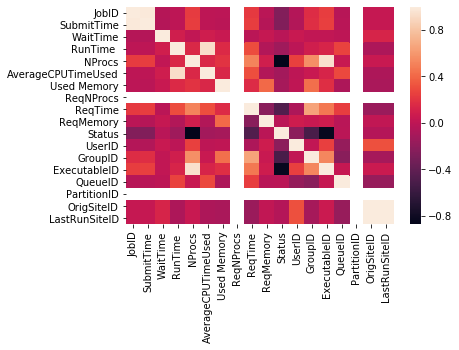

In [126]:
sns.heatmap(corr)

In [127]:
df=df.drop(['PartitionID','ReqNProcs'],axis=1)

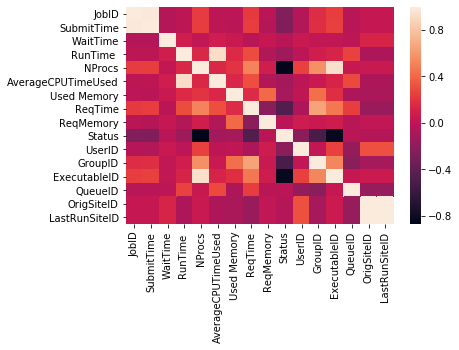

In [128]:
sns.heatmap(df.corr())

In [129]:
Y=np.array(df['WaitTime'])
X=df.drop('WaitTime',axis=1)

In [192]:
def mae(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Absolute Error """
    return np.mean(np.abs(_error(actual, predicted)))

In [188]:

def _error(actual: np.ndarray, predicted: np.ndarray):
    """ Simple error """
    return actual - predicted


def _percentage_error(actual: np.ndarray, predicted: np.ndarray):
    """
    Percentage error
    Note: result is NOT multiplied by 100
    """
    return _error(actual, predicted) / (actual + EPSILON)



def _naive_forecasting(actual: np.ndarray, seasonality: int = 1):
    """ Naive forecasting method which just repeats previous samples """
    return actual[:-seasonality]

In [169]:
# def smape(A, F):
#     return 100/len(A) * np.sum(np.abs(F - A) / (np.abs(A) + np.abs(F)))

def smape(actual: np.ndarray, predicted: np.ndarray):
    """
    Symmetric Mean Absolute Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.mean(2.0 * np.abs(actual - predicted) / ((np.abs(actual) + np.abs(predicted)) + EPSILON))

In [170]:
def rmse(actual: np.ndarray, predicted: np.ndarray):
    """ Root Mean Squared Error """
    return np.sqrt(mse(actual, predicted))

def mse(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Squared Error """
    return np.mean(np.square(_error(actual, predicted)))

In [171]:
def mase(actual: np.ndarray, predicted: np.ndarray, seasonality: int = 1):
    """
    Mean Absolute Scaled Error
    Baseline (benchmark) is computed with naive forecasting (shifted by @seasonality)
    """
    return mae(actual, predicted) / mae(actual[seasonality:], _naive_forecasting(actual, seasonality))

# Linear Regression

In [172]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2,random_state = 0)


In [173]:
train.shape,test.shape

((16000, 16), (4001, 16))

In [174]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [175]:
train_y=np.array(train['WaitTime'])
train_x=train.drop('WaitTime',axis=1)
test_y=np.array(test['WaitTime'])
test_x=test.drop('WaitTime',axis=1)

In [176]:
regressor = LinearRegression()  
regressor.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [177]:
a=regressor.score(train_x,train_y)
a

0.0348950253276511

In [178]:
y_pred = regressor.predict(test_x)

In [179]:
b=regressor.score(test_x,test_y)
b

0.016412023074537152

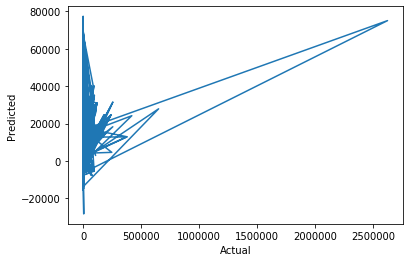

In [180]:
plt.plot(test_y,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [181]:
from sklearn.metrics import mean_absolute_error 
MAE = mean_absolute_error(test_y , y_pred)
print(MAE)

12734.74240184711


In [182]:
smape(test_y,y_pred)

1.8203922910962773

In [183]:
prediction=regressor.predict(X)
regressor.score(X,Y)

0.03283135493838718

In [184]:
mean_absolute_error(Y ,prediction)

13821.14078943704

In [185]:
smape(Y,prediction)

1.8205510627407562

In [189]:
rmse(Y,prediction)


62755.760870320664

In [193]:
mase(Y,prediction)

3.0986175117561285

# Decision Tree

In [224]:
from sklearn.tree import DecisionTreeRegressor

In [225]:
regr_1 = DecisionTreeRegressor()
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=7)

In [226]:
regr_1.fit(train_x,train_y)
regr_2.fit(train_x, train_y)
regr_3.fit(train_x, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [227]:
test_1=regr_1.predict(test_x)
test_2=regr_2.predict(test_x)
test_3=regr_3.predict(test_x)

In [228]:
regr_1.score(train_x,train_y)


1.0

In [229]:
regr_2.score(train_x,train_y)

0.7585707838544524

In [230]:
regr_3.score(train_x,train_y)

0.9464378248256526

In [231]:
regr_1.score(test_x,test_y)


0.9430280087700549

In [232]:
regr_2.score(test_x,test_y)

0.624341668752822

In [233]:
regr_3.score(test_x,test_y)

0.893902050217434

In [234]:
MAE = mean_absolute_error(test_y , test_1)
print(MAE)

1057.3834041489627


In [235]:
MAE = mean_absolute_error(test_y , test_2)
print(MAE)

7947.548014767518


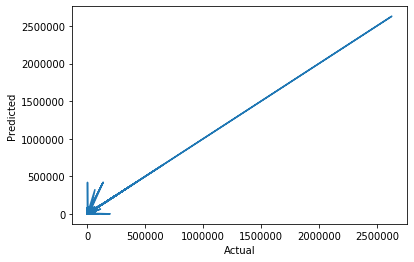

In [236]:
plt.plot(test_y,test_1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

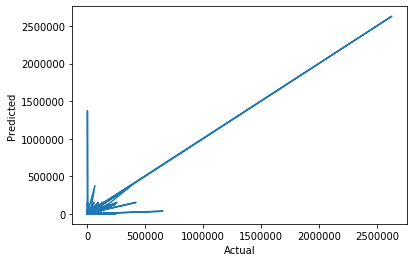

In [237]:
plt.plot(test_y,test_2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [238]:
smape(test_y,test_1)


0.43641965614819667

In [239]:
smape(test_y,test_2)

1.7460047198659165

In [240]:
prediction=regr_1.predict(X)
regr_1.score(X,Y)

0.9934313992854271

In [241]:
mean_absolute_error(Y,prediction)

211.51897405129745

In [242]:
smape(Y,prediction)

0.08730138714308958

In [243]:
rmse(Y,prediction)

5171.766715553013

In [244]:
mase(Y,prediction)

0.047421295177381424

In [245]:
prediction=regr_2.predict(X)
regr_1.score(X,Y)

0.9934313992854271

In [246]:
mean_absolute_error(Y,prediction)

8347.061254524442

In [247]:
smape(Y,prediction)

1.745718971423912

In [248]:
rmse(Y,prediction)

32342.583110361804

In [249]:
mase(Y,prediction)

1.8713614577124944

In [250]:
prediction=regr_3.predict(X)
regr_1.score(X,Y)

0.9934313992854271

In [251]:
mean_absolute_error(Y,prediction)

5766.460755145496

In [252]:
smape(Y,prediction)

1.7293777928915723

In [253]:
rmse(Y,prediction)

15580.533507432743

In [254]:
mase(Y,prediction)

1.292806183582484

# Random Forest Regressor

In [255]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(
  n_estimators=5, 
  max_depth=10, 
  bootstrap=False, 
  random_state=1
)
reg.fit(train_x, train_y)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [256]:
reg.score(train_x,train_y)

0.9823468127505879

In [257]:
pred=reg.predict(test_x)
reg.score(test_x,test_y)

0.9191150245761806

In [258]:
MAE = mean_absolute_error(test_y , pred)
print(MAE)

3602.598756576392


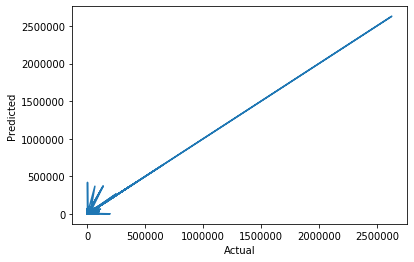

In [259]:
plt.plot(test_y,pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [260]:
smape(test_y,pred)

1.622698923697883

In [261]:
prediction=reg.predict(X)
reg.score(X,Y)

0.9750577187058784

In [262]:
mean_absolute_error( Y, prediction)

3242.294699037014

In [263]:
smape(Y,prediction)

1.6167593318886189

In [264]:
rmse(Y,prediction)

10077.912459457943

In [265]:
mase(Y,prediction)

0.7269031757775312

# Support vector machine Regression


In [266]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf',gamma='auto')
regressor.fit(train_x,train_y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [267]:
regressor.score(train_x,train_y)

-0.01450705095500937

In [276]:
pred=regressor.predict(test_x)
prediction=regressor.predict(X)

In [277]:
regressor.score(test_x,test_y)

-0.019419373961955033

In [279]:
MAE = mean_absolute_error(Y , prediction)
print(MAE)

7817.154731010306


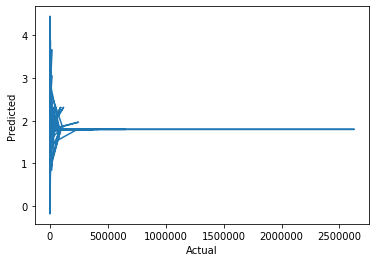

In [280]:
plt.plot(test_y,pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [281]:
smape(Y,prediction)

0.7843613577186964

In [282]:
rmse(Y,prediction)

64288.91274698368

In [283]:
mase(Y,prediction)

1.7525595687533997

# K-Nearest Neighbour  

In [284]:
from sklearn.neighbors import KNeighborsRegressor

In [285]:
reg=KNeighborsRegressor(n_neighbors=3)

In [286]:
reg.fit(train_x, train_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [287]:
reg.score(train_x,train_y)

0.7960313327519342

In [288]:
p=reg.predict(test_x)

In [289]:
reg.score(test_x,test_y)

0.6328908638895303

In [290]:
MAE = mean_absolute_error(test_y , p)
print(MAE)

2788.6738315421144


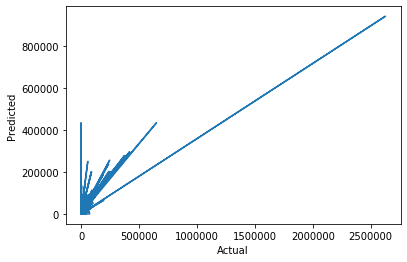

In [291]:
plt.plot(test_y,p)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [292]:
smape(test_y,p)

0.5492609044163905

In [293]:

p=reg.predict(X)
reg.score(X,Y)

0.7772362397092665

In [294]:
mean_absolute_error(Y,p)

2487.1992233721644

In [295]:
smape(Y,p)

0.43797093176744883

In [296]:
rmse(Y,p)

30117.905432368658

In [297]:
mase(Y,p)

0.5576152639047928

# XGBoost regressor

In [299]:
from xgboost import XGBRegressor

XGBModel = XGBRegressor()
XGBModel.fit(train_x,train_y , verbose=False)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(X)
MAE = mean_absolute_error( Y, XGBpredictions)
print('XGBoost validation MAE = ',MAE)

XGBoost validation MAE =  1479.1648593689702


In [300]:
XGBModel.score(X,Y)

0.9958095163958876

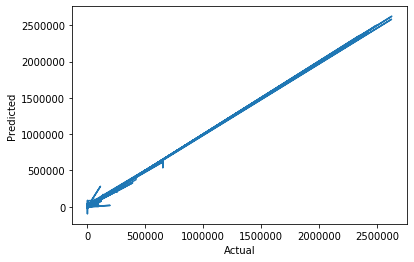

In [301]:
plt.plot(Y,XGBpredictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [302]:
smape(Y,XGBpredictions)

1.613057133024728

In [303]:
rmse( Y, XGBpredictions)

4130.803801909101

In [304]:
mase( Y, XGBpredictions)

0.33161995857229604